In [1]:
import numpy as np
import hapke
import matplotlib.pyplot as plt
from scipy import optimize

listo


In [6]:
T = 80

n = hapke.opticalconstants(T)['n']
k = hapke.opticalconstants(T)['k']
wav = hapke.opticalconstants(T)['wav']

n2 = hapke.opticalconstants(T, crystallinity=False)['n']
k2 = hapke.opticalconstants(T, crystallinity=False)['k']
wav2 = hapke.opticalconstants(T, crystallinity=False)['wav']

#fig, ax = plt.subplots()
#ax.plot(wav, k, label='n')
#ax.plot(wav2, k2, label='n2')
#ax.set_xlabel('Wavelength (um)')
#ax.set_ylabel('Index of Refraction')
#ax.set_title(f'Crystalline Ice at 20 K')
#ax.legend()
#plt.show()

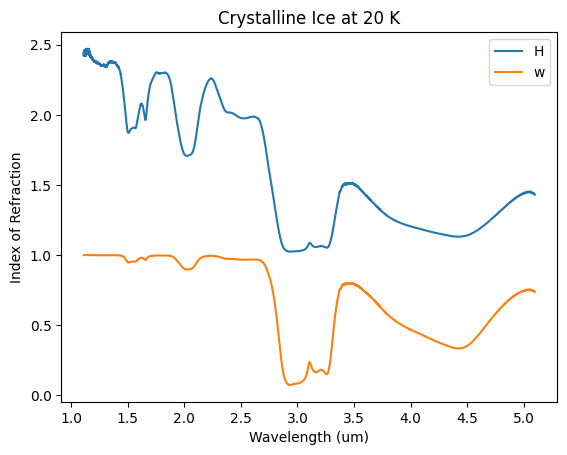

In [13]:
phi, D, theta_bar = [0.35, 10 ** (-5), np.deg2rad(15)]
eme, inc, phase = [np.deg2rad(40), np.deg2rad(30), np.deg2rad(15)]

parameters = [phi, D, theta_bar]
angles = [eme, inc, phase]

w = hapke.singlescatteringalbedo(n,k,wav,D)

H = hapke.H(w,np.cos(eme))

result = hapke.hapke_model(parameters,wav,angles, n, k)

IF = result['IF']

fig, ax = plt.subplots()
#ax.plot(wavelength_range1, H, label='lambda')
ax.plot(wav, H, label='H')
ax.plot(wav, w, label='w')
ax.set_xlabel('Wavelength (um)')
ax.set_ylabel('Index of Refraction')
ax.set_title(f'Crystalline Ice at 20 K')
ax.legend()
plt.show()

In [ ]:
B_C0 = 0.35
meanfreepath = 33 * 10 ** (-6)
g_values_deg = np.linspace(0.1, 10, 150)
g_values = [np.deg2rad(g) for g in g_values_deg]

K = hapke.porosityparameter(0.35)

wavelength = np.linspace(1, 5, 5)

cboe = np.empty((len(g_values),len(wavelength)))

for j in range(len(wavelength)):
    for i in range(len(g_values)):
        cboe[i,j] = hapke.cboe(B_C0,meanfreepath,wavelength[j],g_values[i],K)

fig, ax = plt.subplots(figsize=(6, 6))
for i in range(len(wavelength)):
    ax.plot(g_values_deg, cboe[:,i], label = f'$\lambda$ = {wavelength[i]} $\mu$m')
plt.tick_params(axis='x', which='major', labelsize=12)
plt.tick_params(axis='y', which='major', labelsize=12)
ax.set_xlabel('Phase angle [deg]', fontsize = 12)
ax.set_ylabel(f'CBOE', fontsize = 12)
ax.set_title('')
ax.legend(fontsize = 12)
plt.show()

In [ ]:
B_S0 = 0.35
phi_range = np.linspace(0.1, 0.75, 5)
g_values_deg = np.linspace(0.1, 180, 150)
g_values = [np.deg2rad(g) for g in g_values_deg]


shoe = np.empty((len(g_values),len(phi_range)))

for j in range(len(phi_range)):
    for i in range(len(g_values)):
        shoe[i,j] = hapke.shoe(B_S0,phi_range[j],g_values[i])

fig, ax = plt.subplots(figsize=(6, 6))
for i in range(len(wavelength)):
    ax.plot(g_values_deg, shoe[:,i], label = f'$\phi$ = {phi_range[i]:.2f}')
plt.tick_params(axis='x', which='major', labelsize=12)
plt.tick_params(axis='y', which='major', labelsize=12)
ax.set_xlabel('Phase angle [deg]', fontsize = 12)
ax.set_ylabel(f'SHOE', fontsize = 12)
ax.set_title('')
ax.legend(fontsize = 12)
plt.show()

In [ ]:
# EXAMPLE OF APPLICATION OF HAPKE MODEL WITH A SINGLE INPUT

i = np.deg2rad(53.01319710728901)
e = np.deg2rad(49.93917887149129)
g = np.deg2rad(30.39452822011539)

psi = hapke.phasetoazimuth(g,e,i)
mu = np.cos(e)
mu_0 = np.cos(i)

D = 10 ** (-6)

theta_bar= np.deg2rad(30)

phi = 0.35

B_S0 = 0.53
b = 0.2
B_C0 = 0.35

transport_mean_free_path = 33 * 10 ** (-6)

K = hapke.porosityparameter(phi)
h_S = 3* K * phi/ 8

B_SH = hapke.shoe(B_S0,phi,g)
c = hapke.hockey_stick(b)

p = hapke.phase_function(b, c, g)
[mu_0e, mu_e, S] = hapke.shadowingfunction(i, e, psi, theta_bar)



w = []
for i in range(len(n_range1)):
    w.append(hapke.singlescatteringalbedo(n_range1[i], k_range1[i], wavelength_range1[i], D))

B_CB = []
for i in range(len(wavelength_range1)):
    B_CB.append(hapke.cboe(B_C0,transport_mean_free_path,wavelength_range1[i],g,K))

r = []
for i in range(len(wavelength_range1)):
    r.append(K * w[i]/(4*np.pi) * mu_0e/(mu_0e + mu_e) * (p * B_SH + hapke.H(w[i], mu_0e) * hapke.H(w[i], mu_e) - 1) * B_CB[i] * S)

IF1 = []
for i in range(len(wavelength_range1)):
    IF1.append(r[i]*np.pi)


w2 = []
for i in range(len(n_range2)):
    w2.append(hapke.singlescatteringalbedo(n_range2[i], k_range2[i], wavelength_range2[i], D))

B_CB2 = []
for i in range(len(wavelength_range2)):
    B_CB2.append(hapke.cboe(B_C0,transport_mean_free_path,wavelength_range2[i],g,K))

r2 = []
for i in range(len(wavelength_range2)):
    r2.append(K * w2[i]/(4*np.pi) * mu_0e/(mu_0e + mu_e) * (p * B_SH + hapke.H(w2[i], mu_0e) * hapke.H(w2[i], mu_e) - 1) * B_CB2[i] * S)

IF2 = []
for i in range(len(wavelength_range2)):
    IF2.append(r2[i]*np.pi)

massfraction_am = 0.5

w_mix = hapke.singlescatteringalbedomixed(massfraction_am,w,w2[1:])
phase_mix = hapke.phasefunctionmixed(massfraction_am,w,w2[1:],p,p)
S_c = np.empty(len(n_range1))
S_am = np.empty(len(n_range2))

for i in range(len(n_range1)):
    S_c = ((n_range1[i] - 1) ** 2 + k_range1[1] ** 2) / ((n_range1[1] + 1) ** 2 + k_range1[1] ** 2)

for i in range(len(n_range2)):
    S_am = ((n_range2[i] - 1) ** 2 + k_range2[1] ** 2) / ((n_range2[1] + 1) ** 2 + k_range2[1] ** 2)

r3 = []
for i in range(len(wavelength_range1)):
    r3.append(K * w_mix[i]/(4*np.pi) * mu_0e/(mu_0e + mu_e) * (phase_mix[i] * 1 + hapke.H(w_mix[i], mu_0e) * hapke.H(w_mix[i], mu_e) - 1) * 1 * S)

IF3 = np.array(r3) * np.pi


#b_s0 = hapke.shoe_amp_mix(massfraction_am,w,w2,p,p,S_c, S_am)

fig, ax = plt.subplots()
ax.plot(wavelength_range1, IF1, label = 'IF1')
ax.plot(wavelength_range2, IF2, label = 'IF2')
ax.plot(wavelength_range1, IF3, label = 'IF3')
ax.set_xlabel('Wavelength (um)')
ax.set_ylabel('I/F')
ax.set_title('')
ax.legend()
plt.show()

fig, ax = plt.subplots()
ax.plot(wavelength_range2, w2, label = 'w am')
ax.plot(wavelength_range1, w, label = 'w c')
ax.plot(wavelength_range1, w_mix, label = 'mix w')
ax.set_xlabel('Wavelength (um)')
ax.set_ylabel('I/F')
ax.set_title('')
ax.legend()
plt.show()

In [ ]:
# EXAMPLE OF APPLICATION OF HAPKE MODEL WITH DIFFERENT GRAIN SIZES

i = np.deg2rad(20)
e = np.deg2rad(50)
psi = np.deg2rad(100)
g = hapke.azimuthtophase(psi,e,i)

mu = np.cos(e)
mu_0 = np.cos(i)

D = [2, 20, 200, 2000]

theta_bar= np.deg2rad(50)

phi = 0.25

B_S0 = 0.53
b = 0.2
B_C0 = 0.35

transport_mean_free_path = 33

K = hapke.porosityparameter(phi)
h_S = 3* K * phi/ 8

B_SH = hapke.shoe(B_S0,phi,g)
c = hapke.hockey_stick(b)

p = hapke.phase_function(b, c, g)
[mu_0e, mu_e, S] = hapke.shadowingfunction(i, e, psi, theta_bar)


w = np.empty((len(wavelength_range1), len(D)))
r = np.empty((len(wavelength_range1), len(D)))
IF = np.empty((len(wavelength_range1), len(D)))


for j in range(len(D)):


    for i in range(len(n_range1)):
        w[i,j] = hapke.singlescatteringalbedo(n_range1[i], k_range1[i], wavelength_range1[i], D[j] *10**(-6))


    for i in range(len(wavelength_range1)):
        r[i,j] = K * w[i,j]/(4*np.pi) * mu_0e/(mu_0e + mu_e) * (p * B_SH + hapke.H(w[i,j], mu_0e) * hapke.H(w[i,j], mu_e) - 1) * S


    for i in range(len(wavelength_range1)):
        IF[i,j] = r[i,j]*np.pi



In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
for i in range(len(D)):
    ax.plot(wavelength_range1, IF[:,i], label = f'D = {D[i]} $\mu$m')
ax.set_xlabel('Wavelength [$\mu$m]',fontsize=12)
ax.set_ylabel('I/F',fontsize=12)
ax.set_title('')
plt.tick_params(axis='x', which='major', labelsize=12)
plt.tick_params(axis='y', which='major', labelsize=12)
ax.legend(fontsize=12)
plt.show()

In [ ]:
# APPLICATION OF HAPKE MODEL WITH DIFFERENT INCIDENCE ANGLES

i_values_deg = [0.01,15,30,45,60,75,90]

i_values = [np.deg2rad(i) for i in i_values_deg]
e = np.deg2rad(50)
psi = np.deg2rad(100)
g = [hapke.azimuthtophase(psi,e,i) for i in i_values]


mu = np.cos(e)
mu_0 = [np.cos(i) for i in i_values]

D = 20

theta_bar= np.deg2rad(50)

phi = 0.25

B_S0 = 0.53
b = 0.2
B_C0 = 0.35

transport_mean_free_path = 33

K = hapke.porosityparameter(phi)
h_S = 3* K * phi/ 8

B_SH = [hapke.shoe(B_S0,phi,j) for j in g]
c = hapke.hockey_stick(b)

p = [hapke.phase_function(b, c, j) for j in g]

mu_0e = []
mu_e = []
S = []


for j in range(len(i_values)):

    mu_0e.append(hapke.shadowingfunction(i_values[j], e, psi, theta_bar)[0])
    mu_e.append(hapke.shadowingfunction(i_values[j], e, psi, theta_bar)[1])
    S.append(hapke.shadowingfunction(i_values[j], e, psi, theta_bar)[2])

w = []
B_CB = np.empty((len(wavelength_range1), len(i_values)))
r = np.empty((len(wavelength_range1), len(i_values)))
IF = np.empty((len(wavelength_range1), len(i_values)))

for j in range(len(i_values)):
    for i in range(len(wavelength_range1)):
        B_CB[i,j] = hapke.cboe(B_C0,transport_mean_free_path,wavelength_range1[i],g[j],K)

for i in range(len(n_range1)):
    w.append(hapke.singlescatteringalbedo(n_range1[i], k_range1[i], wavelength_range1[i], D*10**(-6)))

for j in range(len(i_values)):

    for i in range(len(wavelength_range1)):
        r[i,j] = K * w[i]/(4*np.pi) * mu_0e[j]/(mu_0e[j] + mu_e[j]) * (p[j] * B_SH[j] + hapke.H(w[i], mu_0e[j]) * hapke.H(w[i], mu_e[j]) - 1) * B_CB[i,j] * S[j]


    for i in range(len(wavelength_range1)):
        IF[i,j] = r[i,j]*np.pi

fig, ax = plt.subplots()
for i in range(len(i_values)):
    ax.plot(wavelength_range1, IF[:,i], label = f'i = {i_values_deg[i]}')
ax.set_xlabel('Wavelength [$\mu$m]')
ax.set_ylabel('I/F')
ax.set_title('')
ax.legend()
plt.show()

In [ ]:
# APPLICATION OF HAPKE MODEL WITH DIFFERENT EMERGENCE ANGLES

e_values_deg = [0.01,15,30,45,60,75,90]

e_values = [np.deg2rad(i) for i in i_values_deg]
i = np.deg2rad(50)
psi = np.deg2rad(100)
g = [hapke.azimuthtophase(psi,e,i) for e in e_values]


mu_0 = np.cos(i)
mu = [np.cos(e) for e in e_values]

D = 20

theta_bar= np.deg2rad(50)

phi = 0.25

B_S0 = 0.53
b = 0.2
B_C0 = 0.35

transport_mean_free_path = 33 * 10 **(-6)

K = hapke.porosityparameter(phi)
h_S = 3* K * phi/ 8

B_SH = [hapke.shoe(B_S0,phi,j) for j in g]
c = hapke.hockey_stick(b)

p = [hapke.phase_function(b, c, j) for j in g]

mu_0e = []
mu_e = []
S = []


for j in range(len(e_values)):

    mu_0e.append(hapke.shadowingfunction(i, e_values[j], psi, theta_bar)[0])
    mu_e.append(hapke.shadowingfunction(i, e_values[j], psi, theta_bar)[1])
    S.append(hapke.shadowingfunction(i, e_values[j], psi, theta_bar)[2])

w = []
B_CB = np.empty((len(wavelength_range1), len(e_values)))
r = np.empty((len(wavelength_range1), len(e_values)))
IF = np.empty((len(wavelength_range1), len(e_values)))

for j in range(len(e_values)):
    for i in range(len(wavelength_range1)):
        B_CB[i,j] = hapke.cboe(B_C0,transport_mean_free_path,wavelength_range1[i],g[j],K)

for i in range(len(n_range1)):
    w.append(hapke.singlescatteringalbedo(n_range1[i], k_range1[i], wavelength_range1[i], D*10**(-6)))

for j in range(len(e_values)):

    for i in range(len(wavelength_range1)):
        r[i,j] = K * w[i]/(4*np.pi) * mu_0e[j]/(mu_0e[j] + mu_e[j]) * (p[j] * B_SH[j] + hapke.H(w[i], mu_0e[j]) * hapke.H(w[i], mu_e[j]) - 1) * B_CB[i,j] * S[j]


    for i in range(len(wavelength_range1)):
        IF[i,j] = r[i,j]*np.pi

fig, ax = plt.subplots()
for i in range(len(e_values_deg)):
    ax.plot(wavelength_range1, IF[:,i], label = f'e = {e_values_deg[i]}')
ax.set_xlabel('Wavelength [$\mu$m]')
ax.set_ylabel('I/F')
ax.set_title('')
ax.legend()
plt.show()

In [ ]:
# EXAMPLE OF APPLICATION OF HAPKE MODEL WITH DIFFERENT SURFACE ROUGHNESS

i = np.deg2rad(20)
e = np.deg2rad(50)
psi = np.deg2rad(100)
g = hapke.azimuthtophase(psi,e,i)

mu = np.cos(e)
mu_0 = np.cos(i)

D = 20 # IN MICRONS

theta_bar_deg = [5,10,15,20,25,30,35,40,45]
theta_bar_range = [np.deg2rad(theta) for theta in theta_bar_deg]

phi = 0.25

B_S0 = 0.53
b = 0.2
B_C0 = 0.35

transport_mean_free_path = 33

K = hapke.porosityparameter(phi)
h_S = 3* K * phi/ 8

B_SH = hapke.shoe(B_S0,phi,g)
c = hapke.hockey_stick(b)

p = hapke.phase_function(b, c, g)

mu_0e = []
mu_e = []
S = []

for j in range(len(theta_bar_range)):

    mu_0e.append(hapke.shadowingfunction(i, e, psi, theta_bar_range[j])[0])
    mu_e.append(hapke.shadowingfunction(i, e, psi, theta_bar_range[j])[1])
    S.append(hapke.shadowingfunction(i, e, psi, theta_bar_range[j])[2])

w = np.empty((len(wavelength_range1)))
B_CB = []
r = np.empty((len(wavelength_range1), len(theta_bar_range)))
IF = np.empty((len(wavelength_range1), len(theta_bar_range)))

for i in range(len(wavelength_range1)):
    B_CB.append(hapke.cboe(B_C0,transport_mean_free_path,wavelength_range1[i],g,K))
    w[i] = hapke.singlescatteringalbedo(n_range1[i], k_range1[i], wavelength_range1[i], D *10**(-6))


for j in range(len(theta_bar_range)):
    for i in range(len(wavelength_range1)):
        r[i,j] = K * w[i]/(4*np.pi) * mu_0e[j]/(mu_0e[j] + mu_e[j]) * (p * B_SH + hapke.H(w[i], mu_0e[j]) * hapke.H(w[i], mu_e[j]) - 1) * B_CB[i] * S[j]

    for i in range(len(wavelength_range1)):
        IF[i,j] = r[i,j]*np.pi

fig, ax = plt.subplots(figsize = (6,6))
for i in range(len(theta_bar_deg)):
    ax.plot(wavelength_range1, IF[:,i], label = f'$\Theta$ = {theta_bar_deg[i]}')
plt.tick_params(axis='x', which='major', labelsize=12)
plt.tick_params(axis='y', which='major', labelsize=12)
ax.set_xlabel('Wavelength [$\mu$m]', fontsize = 12)
ax.set_ylabel('I/F', fontsize = 12)
ax.set_title('')
ax.legend(fontsize = 12)
plt.show()

In [ ]:
# EXAMPLE OF APPLICATION OF HAPKE MODEL WITH DIFFERENT FILLING FACTORS

i = np.deg2rad(20)
e = np.deg2rad(50)
psi = np.deg2rad(100)
g = hapke.azimuthtophase(psi,e,i)

mu = np.cos(e)
mu_0 = np.cos(i)

D = 20 # IN MICRONS

theta_bar = np.deg2rad(30)

phi_range = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

B_S0 = 0.53
b = 0.2
B_C0 = 0.35

transport_mean_free_path = 33

K = []
h_S = []
B_SH = []

for j in range(len(phi_range)):
    K.append(hapke.porosityparameter(phi_range[j]))
    h_S.append(3* K[j] * phi_range[j]/ 8)
    B_SH.append(hapke.shoe(B_S0,phi_range[j],g))

c = hapke.hockey_stick(b)

p = hapke.phase_function(b, c, g)

[mu_0e, mu_e, S] = hapke.shadowingfunction(i, e, psi, theta_bar)

w = np.empty((len(wavelength_range1)))
B_CB = np.empty((len(wavelength_range1), len(phi_range)))
r = np.empty((len(wavelength_range1), len(phi_range)))
IF = np.empty((len(wavelength_range1), len(phi_range)))

for i in range(len(wavelength_range1)):
    w[i] = hapke.singlescatteringalbedo(n_range1[i], k_range1[i], wavelength_range1[i], D *10**(-6))


for j in range(len(phi_range)):
    for i in range(len(wavelength_range1)):

        B_CB[i,j] = hapke.cboe(B_C0,transport_mean_free_path,wavelength_range1[i],g,K[j])
        r[i,j] = K[j] * w[i]/(4*np.pi) * mu_0e/(mu_0e + mu_e) * (p * B_SH[j] + hapke.H(w[i], mu_0e) * hapke.H(w[i], mu_e) - 1) * B_CB[i,j] * S

        IF[i,j] = r[i,j]*np.pi

fig, ax = plt.subplots(figsize=(6, 6))
for i in range(len(phi_range)):
    ax.plot(wavelength_range1, IF[:,i], label = f'$\phi$ = {phi_range[i]}')
plt.tick_params(axis='x', which='major', labelsize=12)
plt.tick_params(axis='y', which='major', labelsize=12)
ax.set_xlabel('Wavelength [$\mu$m]', fontsize = 12)
ax.set_ylabel('I/F', fontsize = 12)
ax.set_title('')
ax.legend(fontsize = 12)
plt.show()

In [ ]:
T_range_am = [50, 100, 120]
T_range_cry = [50, 100, 120]

data_am = {}
data_cryst = {}

wavelength_am = {}
wavelength_cryst = {}

n_am = {}
n_cryst = {}

k_am = {}
k_cryst = {}

indices_am = {}
indices_cryst = {}

wavelength_range_am = {}
n_range_am = {}
k_range_am = {}

wavelength_range_cryst = {}
n_range_cryst = {}
k_range_cryst = {}

# OPTICAL RANGE OF THE VIMS INSTRUMENT

max_wavelength = 5.1
min_wavelength = 0.35

for t in T_range_am:
    data_am[t] = np.loadtxt('./Optical Constants/Amorphous_' + str(t) + '.txt')
    wavelength_am[t] = [row[0] for row in data_am[t]]
    n_am[t] = [row[1] for row in data_am[t]]
    k_am[t] = [row[2] for row in data_am[t]]
    indices_am[t] = [i for i in range(len(wavelength_am[t])) if min_wavelength <= wavelength_am[t][i] <= max_wavelength]
    wavelength_range_am[t] = [wavelength_am[t][i] for i in indices_am[t]]
    n_range_am[t] = [n_am[t][i] for i in indices_am[t]]
    k_range_am[t] = [k_am[t][i] for i in indices_am[t]]

for t in T_range_cry:
    data_cryst[t] = np.loadtxt('./Optical Constants/Crystalline_' + str(t) + '.txt')
    wavelength_cryst[t] = [row[0] for row in data_cryst[t]]
    n_cryst[t] = [row[1] for row in data_cryst[t]]
    k_cryst[t] = [row[2] for row in data_cryst[t]]
    indices_cryst[t] = [i for i in range(len(wavelength_cryst[t])) if min_wavelength <= wavelength_cryst[t][i] <= max_wavelength]
    wavelength_range_cryst[t] = [wavelength_cryst[t][i] for i in indices_cryst[t]]
    n_range_cryst[t] = [n_cryst[t][i] for i in indices_cryst[t]]
    k_range_cryst[t] = [k_cryst[t][i] for i in indices_cryst[t]]



# Plot n and k against wavelength
fig, ax = plt.subplots()
for t in T_range_am:
    ax.plot(wavelength_range_am[t], k_range_am[t], ls='-.', label='am'+str(t))
for t in T_range_cry:
    ax.plot(wavelength_range_cryst[t], k_range_cryst[t], label='cry'+str(t))
ax.set_xlabel('Wavelength (um)')
ax.set_ylabel('Index of Refraction')
ax.set_title(f'Crystalline Ice at 20 K')
ax.legend()
plt.show()

# Plot n and k against wavelength
fig, ax = plt.subplots()
for t in T_range_am:
    ax.plot(wavelength_range_am[t], n_range_am[t], ls='-.', label='am'+str(t))
for t in T_range_cry:
    ax.plot(wavelength_range_cryst[t], n_range_cryst[t], label='cry'+str(t))
ax.set_xlabel('Wavelength (um)')
ax.set_ylabel('Index of Refraction')
ax.set_title(f'Crystalline Ice at 20 K')
ax.legend()
plt.show()

In [ ]:
i = np.deg2rad(60)
e = np.deg2rad(30)

g_values = np.linspace(np.deg2rad(1), np.deg2rad(179), 100)
psi_values = [hapke.phasetoazimuth(g,e,i) for g in g_values]

theta_bar_deg = [5,10,15,25,40]
theta_bar_range = [np.deg2rad(theta) for theta in theta_bar_deg]

S = np.empty((len(psi_values), len(theta_bar_range)))
for j in range(len(theta_bar_range)):
    for i in range(len(g_values)):
        S[i,j] = hapke.shadowingfunction(i,e,psi_values[i],theta_bar_range[j])[2]

fig, ax = plt.subplots(figsize=(6, 6))
for i in range(len(theta_bar_deg)):
    ax.plot(g_values, S[:,i], label = f'${{\\bar{{\\theta}}}}$ = {theta_bar_deg[i]}$^\circ$')
plt.tick_params(axis='x', which='major', labelsize=12)
plt.tick_params(axis='y', which='major', labelsize=12)
ax.set_xlabel('Phase angle [rad]', fontsize = 12)
ax.set_ylabel(f'Shadowing function $S$', fontsize = 12)
ax.set_title('')
ax.legend(fontsize = 12)
plt.show()


In [ ]:
i = np.deg2rad(30)
e = np.deg2rad(60)

psi_values = np.linspace(np.deg2rad(1), np.deg2rad(179), 150)

theta_bar = np.deg2rad(5)

S = []
for i in range(len(psi_values)):
        S.append(hapke.shadowingfunction(i,e,psi_values[i],theta_bar)[2])

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(psi_values, S[:], label = f'${{\\bar{{\\theta}}}}$ = {theta_bar}$^\circ$')
plt.tick_params(axis='x', which='major', labelsize=12)
plt.tick_params(axis='y', which='major', labelsize=12)
ax.set_xlabel('Phase angle [rad]', fontsize = 12)
ax.set_ylabel(f'Shadowing function $S$', fontsize = 12)
ax.set_title('')
ax.legend(fontsize = 12)
plt.show()

In [ ]:
wavelength = np.linspace(0.7,5.4,100)
mean_path = [5,10,15,20,25,30,35,50]

cboe = np.empty((len(wavelength),len(mean_path)))
K = hapke.porosityparameter(0.35)

for j in range(len(mean_path)):
    for i in range(len(wavelength)):
        cboe[i,j] = hapke.cboe(0.35,mean_path[j]* 10 ** (6),wavelength[i],np.deg2rad(20),hapke.porosityparameter(0.7))

fig, ax = plt.subplots(figsize=(6, 6))
for i in range(len(mean_path)):
    ax.plot(wavelength, cboe[:,i], label = f'Mean Free Path = {mean_path[i]}')
plt.tick_params(axis='x', which='major', labelsize=12)
plt.tick_params(axis='y', which='major', labelsize=12)
ax.set_xlabel('Wavelength [microns]', fontsize = 12)
ax.set_ylabel(f'CBOE', fontsize = 12)
ax.set_title('')
ax.legend(fontsize = 12)
plt.show()

In [ ]:
phase_angle = np.linspace(np.deg2rad(10**(-10)),np.deg2rad(179),100)

phi_range = [0.1,0.2,0.3,0.4,0.5,0.6,0.7]
shoe = np.empty((len(phase_angle),len(phi_range)))
h_s = [3 * hapke.porosityparameter(phi) * phi / 8 for phi in phi_range]

for j in range(len(phi_range)):
    for i in range(len(phase_angle)):
        shoe[i,j] = hapke.shoe(0.9,phi_range[j],phase_angle[i])

fig, ax = plt.subplots(figsize=(6, 6))
for i in range(len(phi_range)):
    ax.plot(phase_angle, shoe[:,i], label = f'h = {h_s[i]}')
plt.tick_params(axis='x', which='major', labelsize=12)
plt.tick_params(axis='y', which='major', labelsize=12)
ax.set_xlabel('Phase angle [rad]', fontsize = 12)
ax.set_ylabel(f'SHOE', fontsize = 12)
ax.set_title('')
ax.legend(fontsize = 12)
plt.show()

In [ ]:
phase_angle = np.linspace(np.deg2rad(10**(-10)),np.deg2rad(179),100)

phi = 0.3
B_shoe = [0.4,0.5,0.6,0.7,0.8,0.9]
shoe = np.empty((len(phase_angle),len(B_shoe)))

for j in range(len(B_shoe)):
    for i in range(len(phase_angle)):
        shoe[i,j] = hapke.shoe(B_shoe[j],phi,phase_angle[i])

fig, ax = plt.subplots(figsize=(6, 6))
for i in range(len(B_shoe)):
    ax.plot(phase_angle, shoe[:,i], label = f'B0 = {B_shoe[i]}')
plt.tick_params(axis='x', which='major', labelsize=12)
plt.tick_params(axis='y', which='major', labelsize=12)
ax.set_xlabel('Phase angle [rad]', fontsize = 12)
ax.set_ylabel(f'SHOE', fontsize = 12)
ax.set_title('')
ax.legend(fontsize = 12)
plt.show()

In [ ]:
# EXAMPLE OF APPLICATION OF HAPKE MODEL WITH PHASE FUNCTION COEFFICIENTS

i = np.deg2rad(20)
e = np.deg2rad(50)
psi = np.deg2rad(100)
g = hapke.azimuthtophase(psi,e,i)

mu = np.cos(e)
mu_0 = np.cos(i)

D = 20 # IN MICRONS

theta_bar = np.deg2rad(30)

phi = 0.30

B_S0 = hapke.ENCELADUS.B_S0
b_range = np.linspace(0.01,0.99,5)
B_C0 = hapke.ENCELADUS.b_co

transport_mean_free_path = hapke.ENCELADUS.freepath

K = hapke.porosityparameter(phi)
B_SH = hapke.shoe(B_S0,phi,g)

p = [hapke.phase_function(b, hapke.hockey_stick(b), g) for b in b_range]

[mu_0e, mu_e, S] = hapke.shadowingfunction(i, e, psi, theta_bar)

w = np.empty((len(wavelength_range1)))
B_CB = np.empty(len(wavelength_range1))
r = np.empty((len(wavelength_range1), len(b_range)))
IF = np.empty((len(wavelength_range1), len(b_range)))

for i in range(len(wavelength_range1)):
    w[i] = hapke.singlescatteringalbedo(n_range1[i], k_range1[i], wavelength_range1[i], D *10**(-6))


for i in range(len(wavelength_range1)):
        B_CB[i] = hapke.cboe(B_C0,transport_mean_free_path,wavelength_range1[i],g,K)
        for j in range(len(p)):
            r[i,j] = K * w[i]/(4*np.pi) * mu_0e/(mu_0e + mu_e) * (p[j] * B_SH + hapke.H(w[i], mu_0e) * hapke.H(w[i], mu_e) - 1) * B_CB[i] * S
            IF[i,j] = r[i,j]*np.pi

fig, ax = plt.subplots(figsize=(6, 6))
for i in range(len(p)):
    ax.plot(wavelength_range1, IF[:,i], label = f'b = {b_range[i]}')
plt.tick_params(axis='x', which='major', labelsize=12)
plt.tick_params(axis='y', which='major', labelsize=12)
ax.set_xlabel('Wavelength [$\mu$m]', fontsize = 12)
ax.set_ylabel('I/F', fontsize = 12)
ax.set_title('')
plt.show()

In [ ]:
# Set g to 40 degrees in radians
g_values_deg = np.linspace(0.01, 180, 150)
g_values = [np.deg2rad(g) for g in g_values_deg]
# Generate an array of b values
b_range = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

# Apply hockey stick function to b_values to get c_values
c_range = [hapke.hockey_stick(b) for b in b_range]

# Generate an array of P values for each b and c value
P_values = np.empty((len(g_values), len(b_range)))

for j in range(len(b_range)):
    for i in range(len(g_values)):
        P_values[i,j] = hapke.phase_function(b_range[j], c_range[j], g_values[i])
from fractions import Fraction

# Plot P versus b
for i in range(len(b_range)):
    plt.plot(g_values_deg, P_values[:,i], label = f'b = {b_range[i]}')
plt.xlabel(f'Phase angle $g$ [deg]')
plt.ylabel(f'Phase function $P$')
plt.yscale('log')
#x_ticks = [0, np.pi/2, np.pi, 3 * np.pi / 2, 2 * np.pi]
#x_labels = [f"${Fraction(t/np.pi).limit_denominator(4)}\pi$" for t in x_ticks]
#plt.xticks(x_ticks, x_labels)  # Set custom x-axis tick labels

plt.legend()
plt.title('')
plt.show()